# **Ensuring Quality Control Automation of Manufacturing in the Telecommunication Industry**

In [272]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [273]:
# Load the dataset
data = pd.read_csv(r'C:\Users\navya\OneDrive\Desktop\telecom manufac.csv')  

In [274]:
# Display the first few rows to understand the structure
print(data.head())

   Production rate(in lkhs)  EMF Radiation(50)  Network latency(350MS)  \
0                       118                 13                     315   
1                        19                  5                     336   
2                       183                 22                     316   
3                        88                 48                      55   
4                        98                 47                     129   

   Brand Ranking(20)  Customer feedback(5)  Speed(100mbps)  Quality Standards  
0                 16                     2              85             75.835  
1                 14                     1              47             58.298  
2                 12                     3              32             78.443  
3                  1                     1               7             27.567  
4                  3                     3              67             47.884  


In [275]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Production rate(in lkhs)  1000 non-null   int64  
 1   EMF Radiation(50)         1000 non-null   int64  
 2   Network latency(350MS)    1000 non-null   int64  
 3   Brand Ranking(20)         1000 non-null   int64  
 4   Customer feedback(5)      1000 non-null   int64  
 5   Speed(100mbps)            1000 non-null   int64  
 6   Quality Standards         1000 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 54.8 KB


In [276]:
data.isnull().sum()

Production rate(in lkhs)    0
EMF Radiation(50)           0
Network latency(350MS)      0
Brand Ranking(20)           0
Customer feedback(5)        0
Speed(100mbps)              0
Quality Standards           0
dtype: int64

In [277]:
data.describe()

,Production rate(in lkhs),EMF Radiation(50),Network latency(350MS),Brand Ranking(20),Customer feedback(5),Speed(100mbps),Quality Standards
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,101.191000,25.831000,178.409000,10.523000,2.960000,50.499000,51.027815
std,57.153609,14.435748,100.775162,5.929809,1.418595,29.284425,16.467256
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.964000
25%,53.000000,13.000000,97.000000,5.000000,2.000000,24.000000,38.685250
50%,104.000000,27.000000,180.000000,11.000000,3.000000,49.000000,50.801500
75%,151.000000,39.000000,263.000000,16.000000,4.000000,77.000000,63.687500
max,200.000000,50.000000,350.000000,20.000000,5.000000,100.000000,91.405000


In [278]:
# removing unwanted columns
data.drop(columns=['Brand Ranking(20)'],inplace=True)
data.drop(columns=['Customer feedback(5)'],inplace=True)

In [271]:
data.head()

,Production rate(in lkhs),EMF Radiation(50),Network latency(350MS),Speed(100mbps),Quality Standards
0,118,13,315,85,75.835
1,19,5,336,47,58.298
2,183,22,316,32,78.443
3,88,48,55,7,27.567
4,98,47,129,67,47.884


# **LINEAR REGRESSION**

**1. Production Rate**

In [252]:
# Define the features and target variable
X = data.drop('Quality Standards', axis=1)  # Features
y = data['Production rate(in lkhs)']  # Target variable

In [253]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [254]:
# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [255]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [256]:
# Evaluating the model
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.878496886574907e-28
R-squared: 1.0


In [257]:
# Display the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                           Coefficient
Production rate(in lkhs)  1.000000e+00
EMF Radiation(50)        -1.172672e-16
Network latency(350MS)   -1.785258e-16
Speed(100mbps)            6.841347e-18


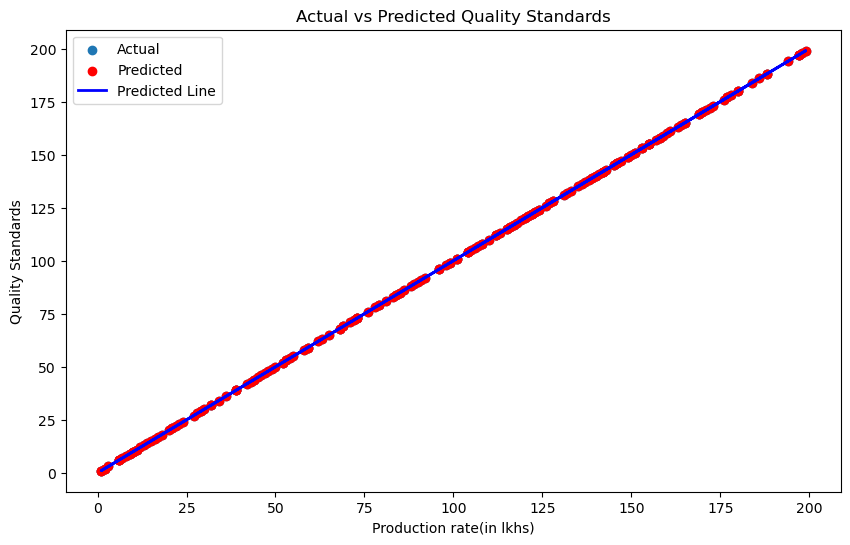

In [258]:
# Choose a feature to plot against y_test
feature_to_plot = 'Production rate(in lkhs)'  # Replace this with the actual feature name

plt.figure(figsize=(10, 6))
plt.scatter(X_test[feature_to_plot], y_test, label='Actual')
plt.scatter(X_test[feature_to_plot], y_pred, label='Predicted', color='red')
plt.plot(X_test[feature_to_plot], y_pred, color='blue', linewidth=2, label='Predicted Line')
plt.xlabel(feature_to_plot)
plt.ylabel('Quality Standards')
plt.title('Actual vs Predicted Quality Standards')
plt.legend()
plt.show()

**2. EMF RADIATION**

In [259]:
# Define the features and target variable
X = data.drop('Quality Standards', axis=1)  # Features
y = data['EMF Radiation(50)']  # Target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Evaluating the model
print(f'Mean Squared Error: {mse}')

# Display the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Mean Squared Error: 3.066285082261771e-28
                           Coefficient
Production rate(in lkhs)  1.014642e-17
EMF Radiation(50)         1.000000e+00
Network latency(350MS)    1.045427e-17
Speed(100mbps)            1.774692e-16


**3. Network latency**

In [260]:
X = data.drop('Quality Standards', axis=1)  # Features
y = data['Network latency(350MS)']  # Target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Evaluating the model
print(f'Mean Squared Error: {mse}')

# Display the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Mean Squared Error: 1.570323835895006e-27
                           Coefficient
Production rate(in lkhs) -4.183548e-16
EMF Radiation(50)         1.389489e-15
Network latency(350MS)    1.000000e+00
Speed(100mbps)           -3.017005e-17


**4. Speed**

In [261]:
X = data.drop('Quality Standards', axis=1)  # Features
y = data['Speed(100mbps)']  # Target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Evaluating the model
print(f'Mean Squared Error: {mse}')

# Display the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Mean Squared Error: 5.3173687006391355e-28
                           Coefficient
Production rate(in lkhs)  1.352856e-17
EMF Radiation(50)         1.082204e-15
Network latency(350MS)   -7.246666e-18
Speed(100mbps)            1.000000e+00


# **RANDOM FOREST**

**1. Production rate**

Accuracy: 0.4


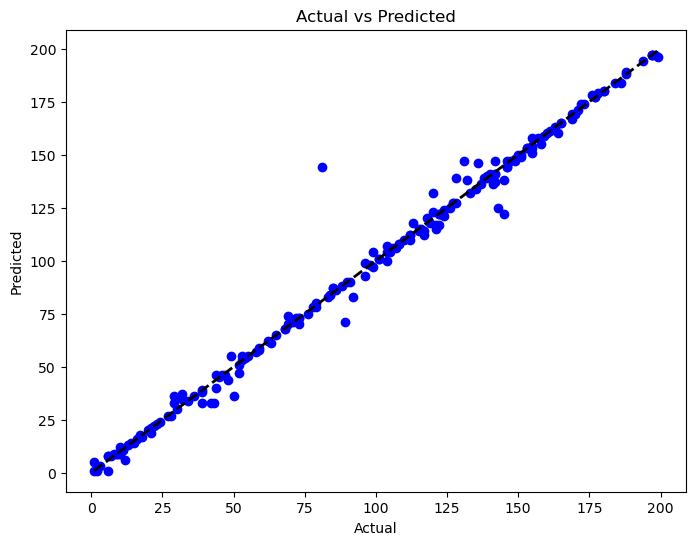

In [262]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming data is already defined and imported
# Define features and target
X = data.drop('Quality Standards', axis=1)  # Features
y = data['Production rate(in lkhs)']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f'Accuracy: {accuracy}')


# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

**2. EMF Radiation**

In [263]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming data is already defined and imported
# Define features and target
X = data.drop('Quality Standards', axis=1)  # Features
y = data['EMF Radiation(50)']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f'Accuracy: {accuracy}')

Accuracy: 0.91


**3. Network Latency**

In [264]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming data is already defined and imported
# Define features and target
X = data.drop('Quality Standards', axis=1)  # Features
y = data['Network latency(350MS)']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f'Accuracy: {accuracy}')

Accuracy: 0.245


**4. Speed**

In [265]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming data is already defined and imported
# Define features and target
X = data.drop('Quality Standards', axis=1)  # Features
y = data['Speed(100mbps)']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f'Accuracy: {accuracy}')

Accuracy: 0.655
